<a href="https://colab.research.google.com/github/tohnperfect/DPDM2024/blob/main/Classification_(dpdm24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML model construction and selection procedure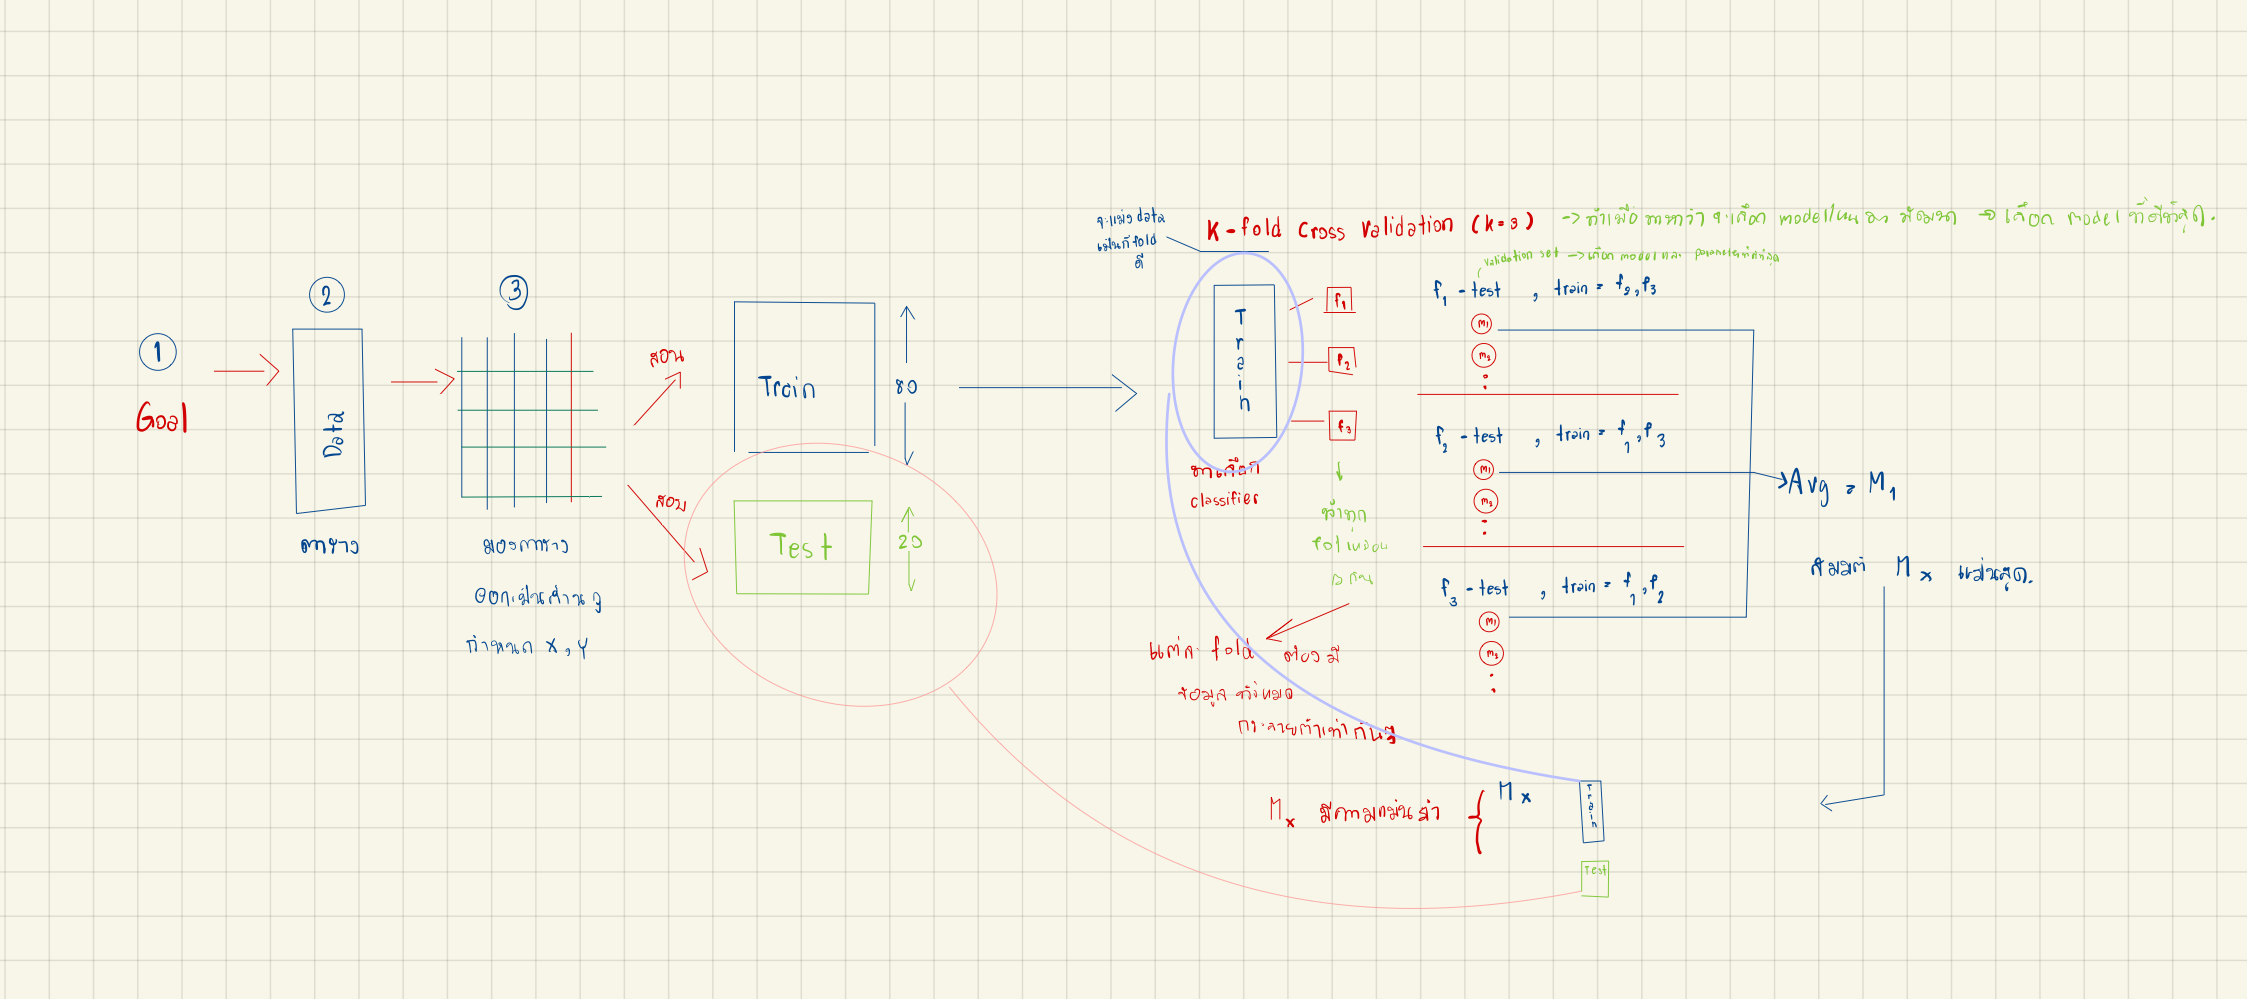

# Data


In [1]:
# prompt: load kdd99 dataset using sklearn

from sklearn.datasets import fetch_kddcup99

# Load the KDD99 dataset
kdd99 = fetch_kddcup99()

# Access the data and target variables
X = kdd99.data
y = kdd99.target

# Print the shape of the data
print(X.shape)
print(y.shape)


(494021, 41)
(494021,)


In [2]:
kdd99

{'data': array([[0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        ...,
        [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0]], dtype=object),
 'target': array([b'normal.', b'normal.', b'normal.', ..., b'normal.', b'normal.',
        b'normal.'], dtype=object),
 'frame': None,
 'target_names': ['labels'],
 'feature_names': ['duration',
  'protocol_type',
  'service',
  'flag',
  'src_bytes',
  'dst_bytes',
  'land',
  'wrong_fragment',
  'urgent',
  'hot',
  'num_failed_logins',
  'logged_in',
  'num_compromised',
  'root_shell',
  'su_attempted',
  'num_root',
  'num_file_creations',
  'num_shells',
  'num_access_files',
  'num_outbound_cmds',
  'is_host_login',
  'is_guest_login',
  'count',
  'srv_count',
  'serror_rate',
  'srv_serror_rate',
  'rerror_rate',
  'srv_rerror_rate',
  'same_s

## ตรวจสอบการกระจายของ class

In [3]:
# prompt: count number of unique class in y

import numpy as np

unique_classes = np.unique(y)
num_unique_classes = len(unique_classes)

print("Number of unique classes:", num_unique_classes)


Number of unique classes: 23


In [10]:
# prompt: print all unique classes

print("Unique classes:", unique_classes)


Unique classes: [b'back.' b'buffer_overflow.' b'ftp_write.' b'guess_passwd.' b'imap.'
 b'ipsweep.' b'land.' b'loadmodule.' b'multihop.' b'neptune.' b'nmap.'
 b'normal.' b'perl.' b'phf.' b'pod.' b'portsweep.' b'rootkit.' b'satan.'
 b'smurf.' b'spy.' b'teardrop.' b'warezclient.' b'warezmaster.']


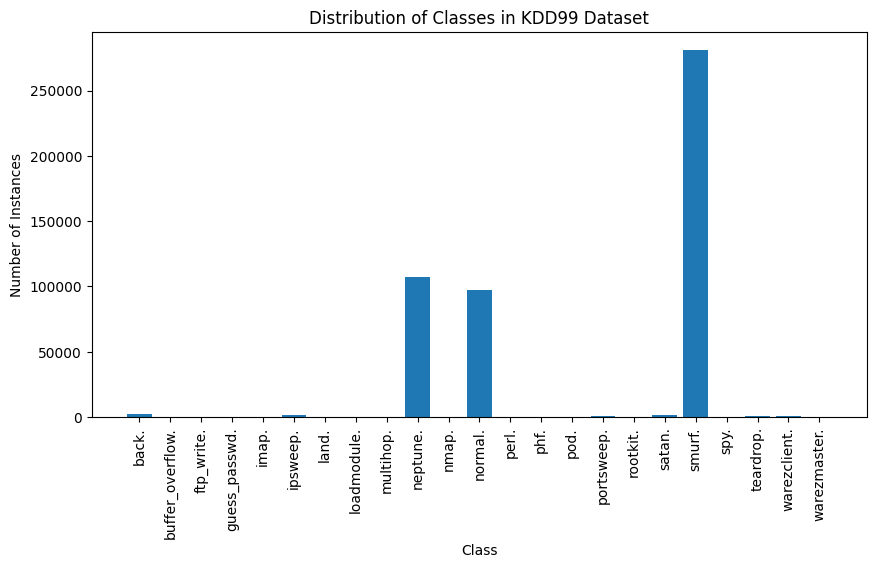

In [11]:
# prompt: plot histogram of the unique classes

import numpy as np
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = np.bincount(np.array([np.where(unique_classes == label)[0][0] for label in y]))

# Create a histogram
plt.figure(figsize=(10, 5))
plt.bar(unique_classes, class_counts)
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.title("Distribution of Classes in KDD99 Dataset")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()


# Goal: 3-class classifier (normal, neptune, smurf)

In [12]:
# prompt: combine X and y into pandas dataframe

import pandas as pd

# Combine X and y into a Pandas DataFrame
df = pd.DataFrame(data=X, columns=kdd99.feature_names)
df['target'] = y

# Print the first few rows of the DataFrame
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [13]:
# prompt: force convert data type of the target column to string

df['target'] = df['target'].astype(str)


In [14]:
# prompt: extract 3 tables, one for target = normal, one for target = neptune, and one for target = smurf

# Extract tables for each target class
df_normal = df[df['target'] == 'normal.']
df_neptune = df[df['target'] == 'neptune.']
df_smurf = df[df['target'] == 'smurf.']

# Print the shapes of the extracted tables
print("Shape of df_normal:", df_normal.shape)
print("Shape of df_neptune:", df_neptune.shape)
print("Shape of df_smurf:", df_smurf.shape)


Shape of df_normal: (97278, 42)
Shape of df_neptune: (107201, 42)
Shape of df_smurf: (280790, 42)


# Train Test Split

10% as a test

In [15]:
# prompt: sampling 10% from each tables (df_normal, df_neptune, df_smuf) and concatenate them into test dataframe. and concatenate the rest into training dataframe

import pandas as pd
# Sample 10% from each table
df_normal_test = df_normal.sample(frac=0.1, random_state=42)
df_neptune_test = df_neptune.sample(frac=0.1, random_state=42)
df_smurf_test = df_smurf.sample(frac=0.1, random_state=42)

# Concatenate the test samples into a test dataframe
df_test = pd.concat([df_normal_test, df_neptune_test, df_smurf_test])

# Remove the test samples from the original dataframes to create the training dataframes
df_normal_train = df_normal.drop(df_normal_test.index)
df_neptune_train = df_neptune.drop(df_neptune_test.index)
df_smurf_train = df_smurf.drop(df_smurf_test.index)

# Concatenate the training samples into a training dataframe
df_train = pd.concat([df_normal_train, df_neptune_train, df_smurf_train])


In [ ]:
df_normal_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
df_neptune_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
7601,0,b'tcp',b'telnet',b'S0',0,0,0,0,0,0,...,6,1.0,0.0,0.2,0.33,1.0,0.83,0.0,0.0,neptune.
7602,0,b'tcp',b'telnet',b'S0',0,0,0,0,0,0,...,16,1.0,0.0,0.07,0.12,1.0,0.94,0.0,0.0,neptune.
53583,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,neptune.
53584,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,8,0.73,0.27,0.09,0.0,1.0,1.0,0.0,0.0,neptune.
53585,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,17,0.81,0.14,0.05,0.0,1.0,1.0,0.0,0.0,neptune.


In [ ]:
df_smurf_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
7793,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,3,0.02,0.02,0.02,0.0,0.0,0.0,0.0,0.0,smurf.
7794,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,13,0.08,0.02,0.08,0.0,0.0,0.0,0.0,0.0,smurf.
7795,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,23,0.14,0.02,0.14,0.0,0.0,0.0,0.0,0.0,smurf.
7796,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,33,0.19,0.02,0.19,0.0,0.0,0.0,0.0,0.0,smurf.
7797,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,43,0.23,0.02,0.23,0.0,0.0,0.0,0.0,0.0,smurf.


# cross validation

In [ ]:
df_train.shape

(436742, 42)

In [ ]:
df_test.shape

(48527, 42)

## 3-fold cross validation


# HW 3 แบ่ง fold โดยการสร้าง column ใหม่

In [16]:
# prompt: สร้าง list ที่มีค่า 1,2,3 ที่วนซ้ำจนมีสมาชิกเท่ากับขนาดของ df_train

fold_list = []
for i in range(df_train.shape[0]):
  fold_list.append((i % 3) + 1)



In [18]:
df_train['fold'] = fold_list

In [19]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,fold
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,1
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,2
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,3
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,2


In [22]:
df_train.groupby('fold')['target'].value_counts()

fold  target  
1     smurf.      84237
      neptune.    32160
      normal.     29184
2     smurf.      84237
      neptune.    32161
      normal.     29183
3     smurf.      84237
      neptune.    32160
      normal.     29183
Name: count, dtype: int64

In [24]:
df_train.groupby('fold')['target'].count()

,target
fold,
1,145581
2,145581
3,145580


# Training Procedure

In [ ]:
# 1. Import model package
from sklearn import tree

# 2. Define model specification
treeX_foldX = tree.DecisionTreeClassifier(max_depth=5)

# 3. Train model
X = dummyX
Y = dummyY
treeX_foldX.fit(X, Y)

# 4. Predict-Evaluation
from sklearn.metrics import classification_report
Y_val_hat = treeX_foldX.predict(X_val)

print(classification_report(Y_val, Y_val_hat))

# HW4 หาต้นไม้ที่ดีที่สุดจาก 2 ต้น แล้ว report test set accuracy